# Домашняя работа №1

# Задача №1

    Построить график зависимости термического КПД паротурбинного цикла без промежуточного перегрева пара при следующих параметрах пара:  P0= 5, 10, 15, 20 MPa. Для каждого значения взять следующие значения температуры  t0= 300, 350, 400, 450, 500 градусов Цельсия,  Pk= 5 kPa. Принять давление за последней ступенью паровой турбины  P2=Pk . Термический КПД цикла оценивать без учета подогрева воды в питательном насосе и регенеративной системе.

In [1]:
    import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np

In [2]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [3]:
# Начальные параметры:
p0 = [5, 10, 15, 20]
for i in range(len(p0)):
    p0[i] = p0[i] * MPa

t0 = [300, 350, 400, 450]
for j in range(len(t0)):
    t0[j] = to_kelvin(t0[j])
    

pk = 5 * kPa
print(p0)
print(t0)

[5000000, 10000000, 15000000, 20000000]
[573.15, 623.15, 673.15, 723.15]


In [4]:
# Определим точки, которые нам нужны
point = []
point_condenser_inlet = []
point_pump_outlet = []
for j in range(len(p0)):
    point.append(gas(P = p0[j] * unit, T = t0[j]))
    point_condenser_inlet.append(gas(P = pk * unit, s = point[j].s))
    point_pump_outlet.append(gas(P = pk * unit, x = 0))

In [5]:
useful_energy = []
full_energy = []
efficiency = []
for j in range(len(p0)):
    useful_energy.append(point[j].h - point_condenser_inlet[j].h)
    full_energy.append(point[j].h - point_pump_outlet[j].h)
    efficiency.append(round(useful_energy[j]/full_energy[j]*100,3))


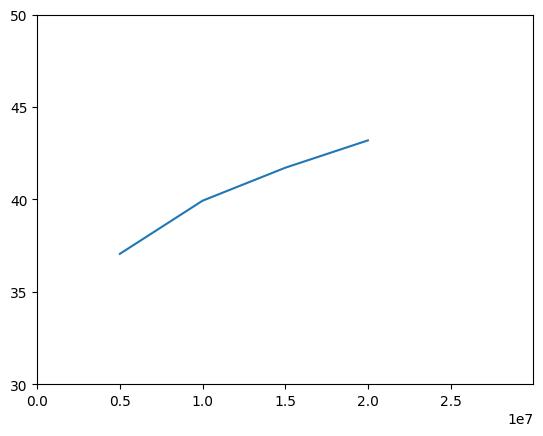

In [6]:
y = []
x = []
for j in range(len(p0)):
    y.append(efficiency[j])
    x.append(p0[j])
    
fig, ax = plt.subplots()

ax.plot(x, y,)

ax.set(xlim = (0 , 30 * MPa), xticks = np.arange(0, 30 * MPa, 5  * MPa, ),
        ylim = (30, 50), yticks = np.arange(30, 55, 5,))

plt.show()

In [7]:
for j in range(len(p0)):
    print("Значение КПД в точке",j+1,":",efficiency[j], "%" )

Значение КПД в точке 1 : 37.05 %
Значение КПД в точке 2 : 39.925 %
Значение КПД в точке 3 : 41.708 %
Значение КПД в точке 4 : 43.188 %
